In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text, plot_tree

#### Tasks:1. Data Preparation:

In [131]:
df=pd.read_excel('heart_disease.xlsx')
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [132]:
df.to_csv('output_file.csv', index=False)
df.to_excel('output_file.xlsx', index=False)

In [133]:
df=pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [134]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [136]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [137]:
df.shape

(908, 13)

#### 2. Exploratory Data Analysis (EDA):

In [138]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [139]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [140]:
num_col=[i for i in df.columns if df[i].dtypes!='object']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

In [141]:
cat_col=[i for i in df.columns if df[i].dtypes=='object']
cat_col

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

##### Visualization

In [142]:
cor_metrics=df.corr(numeric_only=True)
cor_metrics

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


<Axes: >

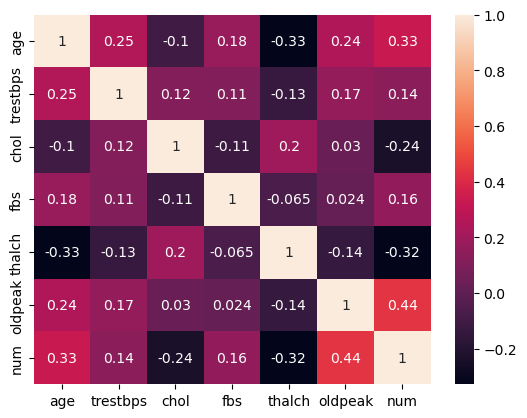

In [143]:
sns.heatmap(cor_metrics,annot=True)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


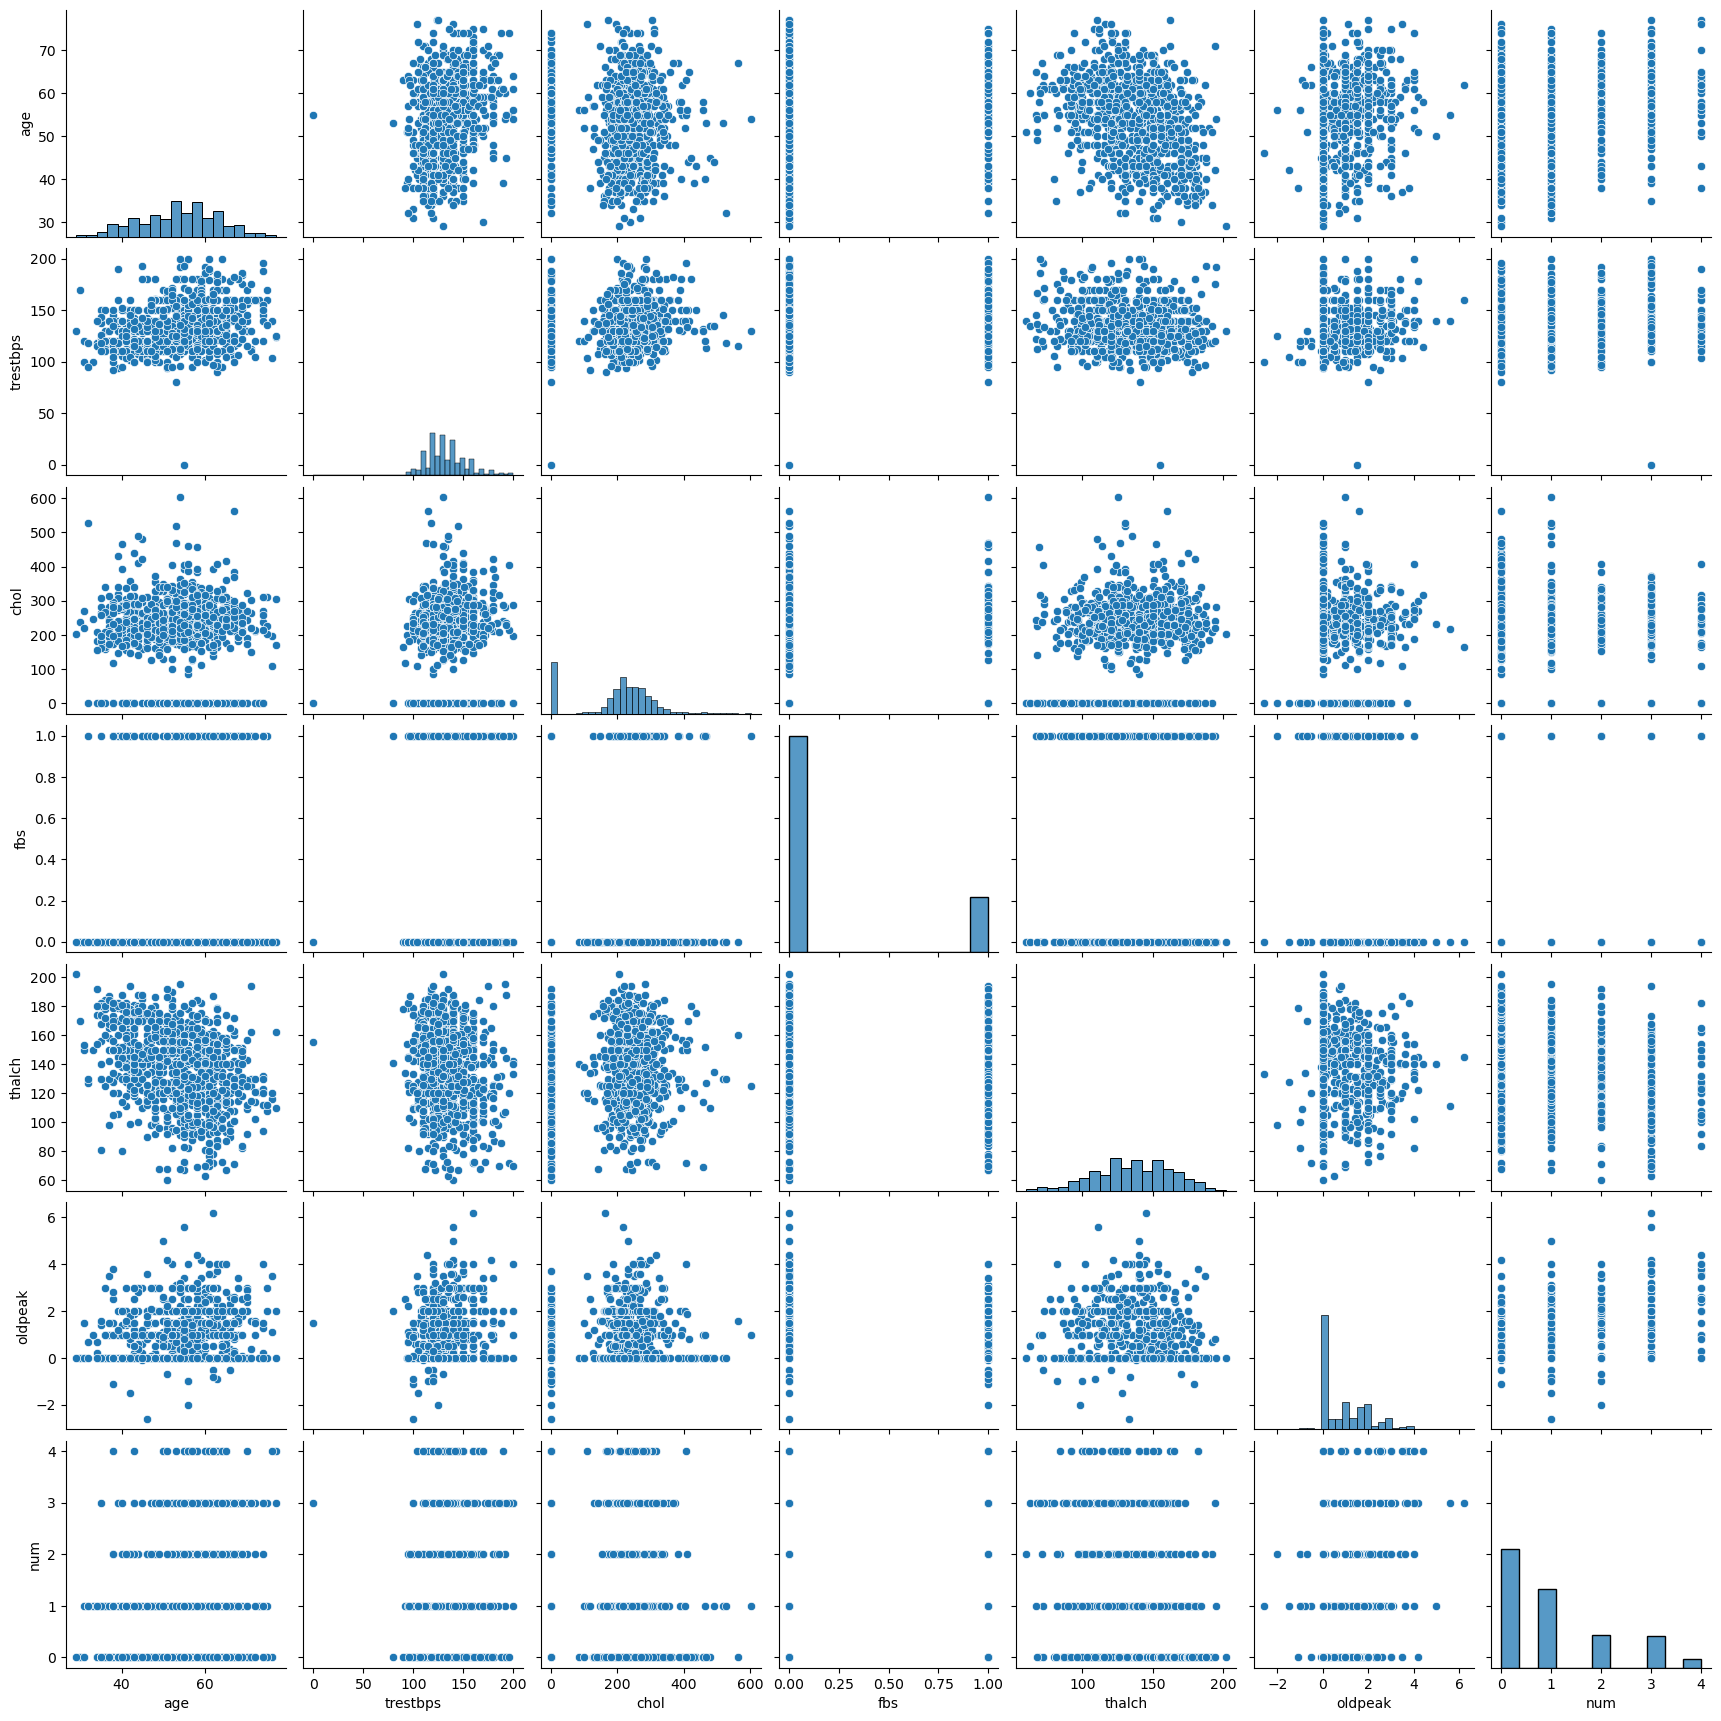

In [144]:
sns.pairplot(df)

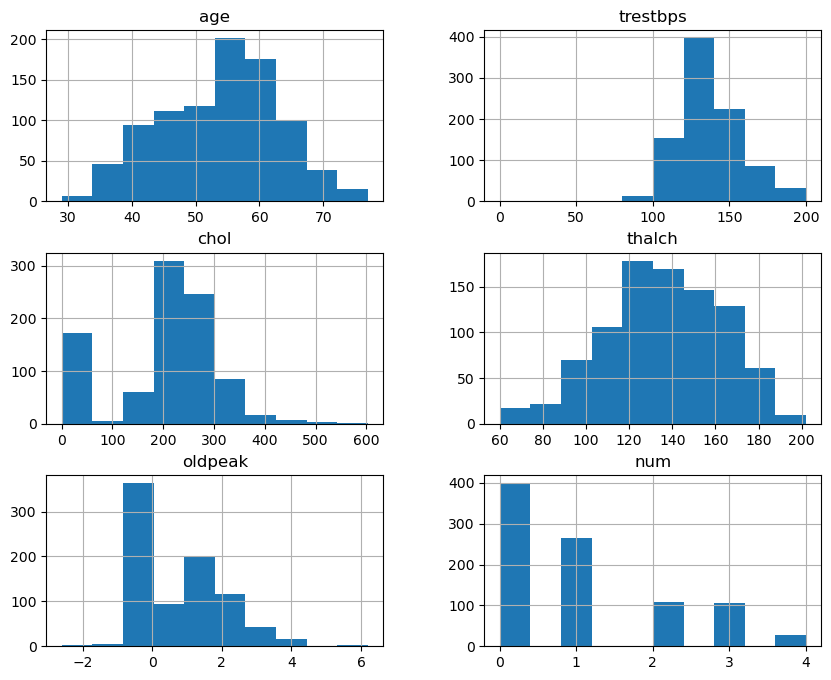

In [145]:
df.hist(figsize=(10, 8));

<Axes: >

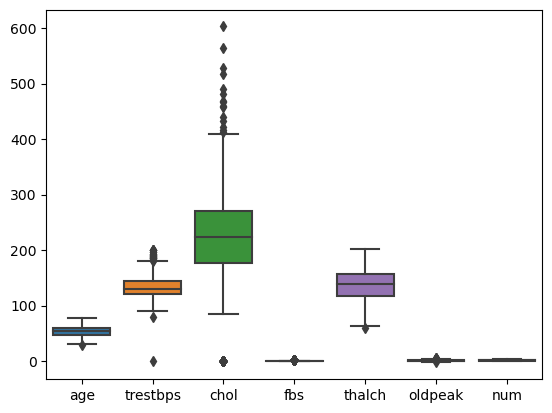

In [146]:
sns.boxplot(data=df)

#### 3. Feature Engineering:

In [147]:
scalar=StandardScaler()

In [148]:
df=pd.get_dummies(df,drop_first=True)

In [149]:
df_scaled=scalar.fit_transform(df)
df_scaled

array([[ 1.00602683,  0.56739446,  0.28129674, ..., -0.69894534,
        -0.85992069, -0.784639  ],
       [-1.39756029,  0.07696688,  0.01352615, ..., -0.69894534,
        -0.85992069, -0.784639  ],
       [ 0.35050307,  0.32218067, -0.0846564 , ..., -0.69894534,
        -0.85992069, -0.784639  ],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, ..., -0.69894534,
         1.16289793, -0.784639  ],
       [ 0.24124911,  0.5183517 ,  0.05815458, ..., -0.69894534,
        -0.85992069, -0.784639  ],
       [ 0.35050307,  0.42026619,  0.67402693, ..., -0.69894534,
        -0.85992069,  1.27447144]])

In [150]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.288612,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,-0.997800,-0.698945,-0.859921,-0.784639
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815249,-0.881977,0.514416,2.122034,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.449360,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815249,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.556834,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,1.301677,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.556834,2.615119,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,-0.997800,1.430727,-0.859921,1.274471
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.928917,2.615119,0.514416,-0.471246,-0.536603,-0.228350,-1.216912,2.018075,1.301677,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,1.274471
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.471556,2.615119,0.514416,-0.471246,1.863574,-0.228350,-1.216912,-0.495522,1.301677,-0.146193,-0.203186,-0.997800,-0.698945,1.162898,-0.784639
906,0.241249,0.518352,0.058155,1.976894,-1.155538,NaN,2.615119,0.514416,-0.471246,1.863574,-0.228350,-1.216912,2.018075,-0.768240,-0.146193,4.921608,-0.997800,-0.698945,-0.859921,-0.784639


In [151]:
df_scaled.fillna(df_scaled.median(),inplace=True)

In [152]:
df_scaled

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.288612,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,-0.997800,-0.698945,-0.859921,-0.784639
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815249,-0.881977,0.514416,2.122034,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.449360,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815249,-0.881977,0.514416,-0.471246,-0.536603,4.379244,-1.216912,-0.495522,-0.768240,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.556834,-0.881977,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,1.301677,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,-0.784639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.556834,2.615119,0.514416,-0.471246,-0.536603,-0.228350,0.821752,-0.495522,-0.768240,-0.146193,-0.203186,-0.997800,1.430727,-0.859921,1.274471
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.928917,2.615119,0.514416,-0.471246,-0.536603,-0.228350,-1.216912,2.018075,1.301677,-0.146193,-0.203186,1.002205,-0.698945,-0.859921,1.274471
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.471556,2.615119,0.514416,-0.471246,1.863574,-0.228350,-1.216912,-0.495522,1.301677,-0.146193,-0.203186,-0.997800,-0.698945,1.162898,-0.784639
906,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.357888,2.615119,0.514416,-0.471246,1.863574,-0.228350,-1.216912,2.018075,-0.768240,-0.146193,4.921608,-0.997800,-0.698945,-0.859921,-0.784639


#### 4. Decision Tree Classification:

In [154]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,41,135,203,False,132,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,0
2,57,140,192,False,148,0.4,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,52,118,186,False,190,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,57,110,201,False,126,1.5,0,1,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,1,0,0,0,1,0,0,0,0,0,1,0,1
904,62,166,170,False,120,3.0,4,1,0,0,0,0,1,1,0,0,1,0,0,1
905,56,170,0,False,123,2.5,4,1,0,1,0,0,0,1,0,0,0,0,1,0
906,56,144,208,True,105,NaN,4,1,0,1,0,0,1,0,0,1,0,0,0,0


In [156]:
target=df[['age']]
target

,age
0,63
1,41
2,57
3,52
4,57
...,...
903,53
904,62
905,56
906,56


In [157]:
features=df.drop(columns='age')
features

,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,145,233,True,150,2.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,135,203,False,132,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,0
2,140,192,False,148,0.4,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,118,186,False,190,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,110,201,False,126,1.5,0,1,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,125,0,False,120,1.5,4,1,0,0,0,1,0,0,0,0,0,1,0,1
904,166,170,False,120,3.0,4,1,0,0,0,0,1,1,0,0,1,0,0,1
905,170,0,False,123,2.5,4,1,0,1,0,0,0,1,0,0,0,0,1,0
906,144,208,True,105,NaN,4,1,0,1,0,0,1,0,0,1,0,0,0,0


In [161]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=42)

In [162]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(726, 19)
(182, 19)
(726, 1)
(182, 1)


In [215]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2,min_samples_split=2)

In [216]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [217]:
y_pred=dec_tree.predict(x_test)

In [218]:
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.04945054945054945

In [200]:
y_pred=dec_tree.predict(x_test)
y_pred

array([52, 48, 54, 60, 55, 52, 54, 54, 52, 60, 57, 55, 54, 41, 54, 55, 54,
       54, 54, 54, 54, 54, 48, 57, 54, 55, 41, 55, 52, 54, 54, 54, 59, 55,
       54, 54, 54, 54, 54, 59, 54, 41, 54, 54, 61, 57, 54, 54, 41, 57, 58,
       54, 45, 54, 54, 54, 54, 54, 60, 59, 61, 41, 60, 54, 48, 54, 52, 54,
       55, 54, 54, 61, 54, 60, 54, 59, 60, 54, 60, 54, 59, 54, 54, 54, 54,
       54, 59, 48, 41, 60, 41, 61, 59, 54, 54, 54, 60, 54, 54, 54, 54, 54,
       57, 52, 54, 54, 55, 54, 60, 54, 54, 54, 54, 55, 54, 61, 54, 48, 52,
       41, 51, 41, 54, 48, 54, 59, 54, 54, 59, 54, 41, 54, 54, 48, 54, 54,
       54, 48, 61, 54, 55, 41, 54, 54, 59, 48, 55, 54, 55, 54, 54, 54, 54,
       61, 41, 54, 52, 41, 54, 41, 54, 54, 54, 41, 48, 48, 55, 57, 54, 54,
       54, 54, 54, 52, 41, 61, 51, 54, 60, 54, 55, 54], dtype=int64)

In [202]:
y_pred=dec_tree.predict(x_test)
report=classification_report(y_test,y_pred,digits=3)
print(report)

              precision    recall  f1-score   support

          32      0.000     0.000     0.000         1
          36      0.000     0.000     0.000         2
          37      0.000     0.000     0.000         3
          38      0.000     0.000     0.000         3
          39      0.000     0.000     0.000         5
          40      0.000     0.000     0.000         2
          41      0.125     0.250     0.167         8
          42      0.000     0.000     0.000         4
          43      0.000     0.000     0.000         6
          44      0.000     0.000     0.000         5
          45      0.000     0.000     0.000         6
          46      0.000     0.000     0.000         6
          47      0.000     0.000     0.000         3
          48      0.000     0.000     0.000         6
          49      0.000     0.000     0.000         4
          50      0.000     0.000     0.000         5
          51      0.000     0.000     0.000         9
          52      0.000    

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [203]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [204]:
roc_auc_score=(y_test,dec_tree.predict_proba(x_test)[:, 1])
roc_auc_score

(     age
 865   63
 439   58
 342   41
 736   61
 785   54
 ..   ...
 580   52
 868   65
 445   53
 786   54
 25    45
 
 [182 rows x 1 columns],
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

#### 5. Hyperparameter Tuning:

In [205]:
param_grid={'max_depth': [1,2,3,4,5,6,7,8,9, 10, 20, 30],
              'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy']}
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._va

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [206]:
best_model=grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, random_state=42)

#### 6. Model Evaluation and Analysis:

In [207]:
y_best_pred=best_model.predict(x_test)
y_best_pred

array([61, 54, 54, 55, 55, 61, 54, 54, 61, 55, 54, 55, 54, 41, 54, 55, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 55, 41, 55, 61, 54, 54, 54, 54, 55,
       54, 54, 54, 54, 54, 54, 54, 41, 54, 54, 61, 54, 54, 54, 41, 54, 55,
       54, 41, 54, 54, 54, 54, 54, 55, 54, 61, 41, 55, 54, 54, 54, 61, 54,
       55, 54, 54, 61, 54, 55, 54, 54, 55, 54, 55, 54, 54, 54, 54, 54, 54,
       54, 54, 54, 41, 55, 41, 61, 54, 54, 54, 54, 55, 54, 54, 54, 54, 54,
       54, 61, 54, 54, 55, 54, 55, 54, 54, 54, 54, 55, 54, 61, 54, 54, 61,
       41, 61, 41, 54, 54, 54, 54, 54, 54, 54, 54, 41, 54, 54, 54, 54, 54,
       54, 54, 61, 54, 55, 41, 54, 54, 54, 54, 55, 54, 55, 54, 54, 54, 54,
       61, 41, 54, 61, 41, 54, 41, 54, 54, 54, 41, 54, 54, 55, 54, 54, 54,
       54, 54, 54, 61, 41, 61, 61, 54, 55, 54, 55, 54], dtype=int64)

In [186]:
y_pred = dt.predict(x_test)
report = classification_report(y_test, y_pred,digits=3)
print(report)

              precision    recall  f1-score   support

          31      0.000     0.000     0.000         0
          32      0.000     0.000     0.000         1
          33      0.000     0.000     0.000         0
          35      0.000     0.000     0.000         0
          36      0.000     0.000     0.000         2
          37      0.000     0.000     0.000         3
          38      0.000     0.000     0.000         3
          39      0.000     0.000     0.000         5
          40      0.000     0.000     0.000         2
          41      0.000     0.000     0.000         8
          42      0.167     0.250     0.200         4
          43      0.000     0.000     0.000         6
          44      0.000     0.000     0.000         5
          45      0.000     0.000     0.000         6
          46      0.000     0.000     0.000         6
          47      0.000     0.000     0.000         3
          48      0.000     0.000     0.000         6
          49      0.000    

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\s

|--- num <= 1.50
|   |--- thalch <= 167.50
|   |   |--- class: 54
|   |--- thalch >  167.50
|   |   |--- class: 41
|--- num >  1.50
|   |--- chol <= 204.00
|   |   |--- class: 61
|   |--- chol >  204.00
|   |   |--- class: 55



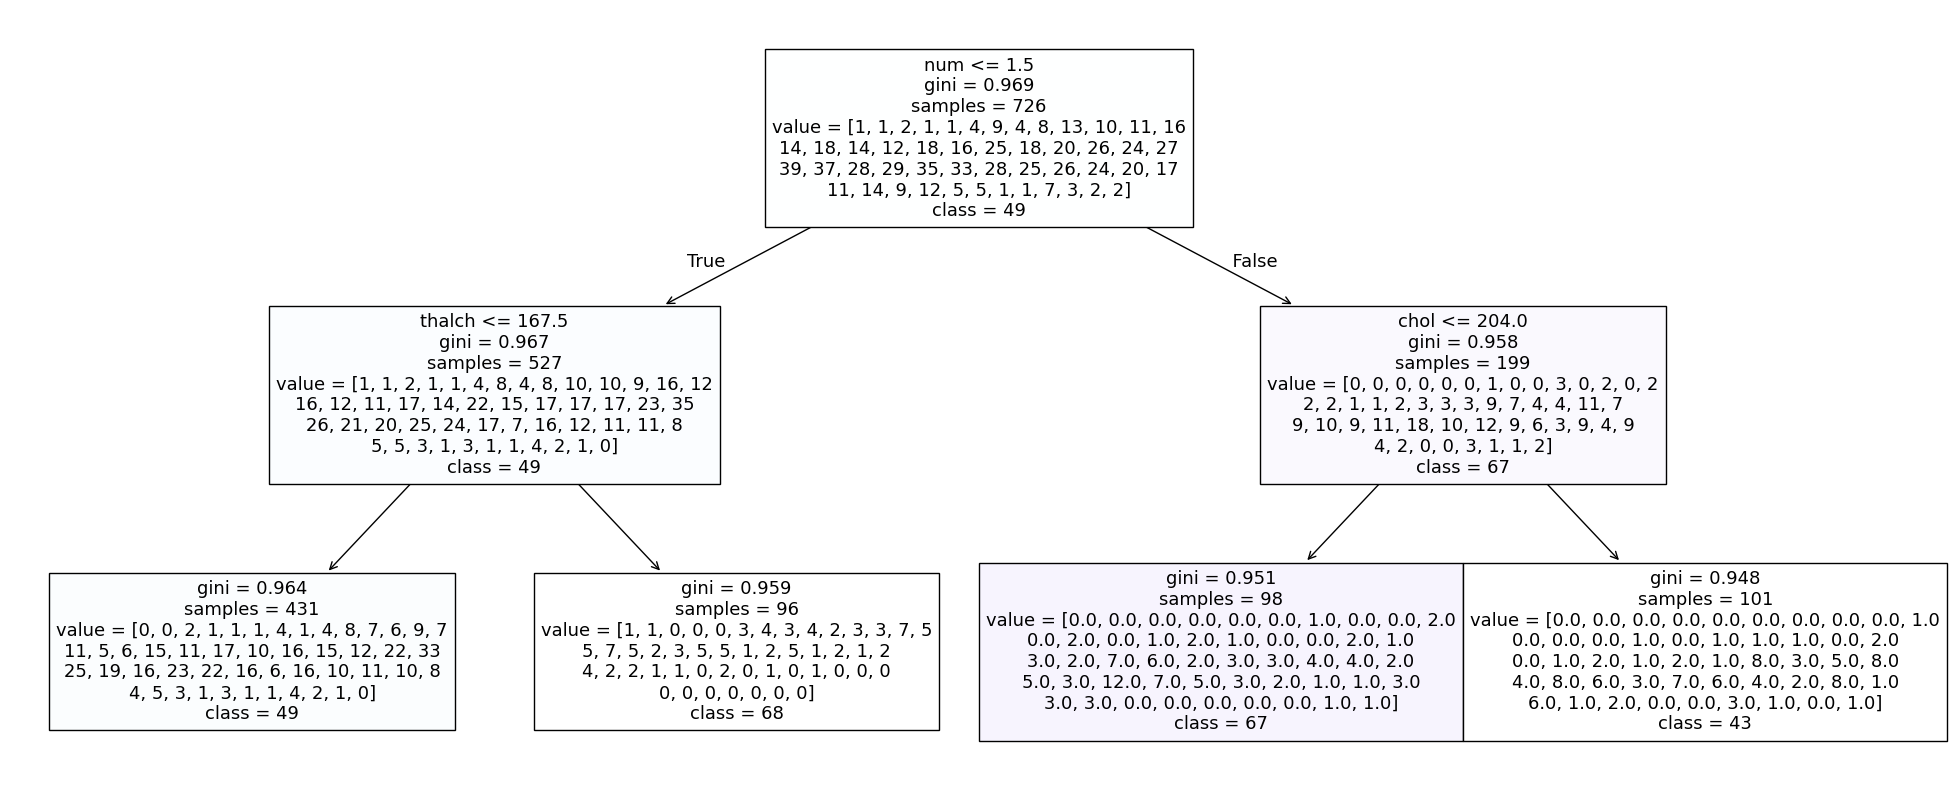

In [214]:
plt.figure(figsize=(25,10))
print(export_text(best_model, feature_names=list(features.columns)))
class_names = df['age'].unique().astype(str)
plot_tree(best_model,feature_names=features.columns,class_names=class_names,filled=True)
plt.show();

### Interview Questions:

#### 1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision trees are powerful and flexible models, and tuning their hyperparameters can significantly impact their performance and behavior. some of the commom hyperparameters for decision tree model are max_depth,min_samples_split,min_samples_leaf,etc..

#### 2.What is the difference between the Label encoding and One-hot encoding?


Label encoding and one-hot encoding are both techniques used to convert categorical data into a numerical format that machine learning algorithms can understand. However, they work differently and are suitable for different types of categorical variables

->Label encoding assigns a unique integer to each category in a categorical variable. -> It works well for ordinal categorical variables, where there is a natural order or ranking among the categories

->One-hot encoding creates binary columns for each category in a categorical variable. -> It works well for nominal categorical variables, where there is no inherent order among the categories...